In [4]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from icecream import ic
from matplotlib import pyplot as plt
import seaborn as sns
from tqdm import tqdm
import math

# Exercise 5: Variance reduction methods

### 1. Estimate the integral from 0 to 1 for exp(x) by simulation (the crude Monte Carlo estimator). Use eg. an estimator based on 100 samples and present the result as the point estimator and a confidence interval.


In [16]:
# We simulate 100 uniformly distributed samples
samples = np.exp(np.random.uniform(size = 100))

# We take the mean of the samples to estimate the integral. 
estimated_integral = np.mean(samples)
ic(estimated_integral)

# We calculate the confidence intervals of the estimation.

mean_blocked = np.mean(samples)
std_blocked = np.std(samples)

# Calculate the 95% confidence interval
confidence_interval = stats.t.interval(0.95, len(samples)-1, loc=mean_blocked, scale=stats.sem(samples))
ic(confidence_interval)

ic| estimated_integral: 1.6613132890946047
ic| confidence_interval: (1.5622015156990832, 1.7604250624901263)


(1.5622015156990832, 1.7604250624901263)

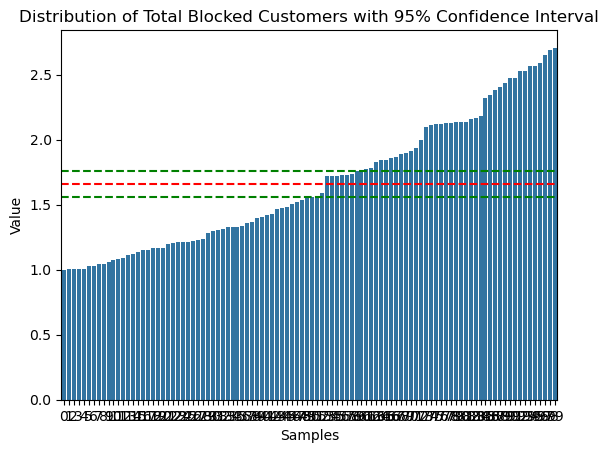

95% Confidence Interval: (1.5622015156990832, 1.7604250624901263)


In [39]:
# Plot the results
sns.barplot(samples)
plt.axhline(mean_blocked, color='r', linestyle='--')
plt.axhline(confidence_interval[0], color='g', linestyle='--')
plt.axhline(confidence_interval[1], color='g', linestyle='--')
plt.xlabel('Samples')
plt.ylabel('Value')
plt.title('Distribution of Total Blocked Customers with 95% Confidence Interval')
plt.show()

# Print the confidence interval
print(f"95% Confidence Interval: {confidence_interval}")

### 2. Estimate the integral from 0 to 1 for exp(x) using antithetic variables, with comparable computer ressources.

In [46]:
samples = []
for i in range(100):
    U_i = np.random.uniform(low=0, high=1)
    Y_i = (np.exp(U_i) + np.exp(1 - U_i)) / 2
    samples.append(Y_i)

np.mean(samples)

1.7201242639500804

In [49]:
# We calculate the confidence intervals of the estimation.

mean = np.mean(samples)
std = np.std(samples)

# Calculate the 95% confidence interval
confidence_interval = stats.t.interval(0.95, len(samples)-1, loc=mean, scale=stats.sem(samples))
ic(confidence_interval)

ic| confidence_interval: (1.7067554213582978, 1.733493106541863)


(1.7067554213582978, 1.733493106541863)

### 3. Estimate the integral from 0 to 1 for exp(x) using a control variable, with comparable computer ressources.

In [109]:
# We can find minimal c

# Generate uniform random samples
U = np.random.uniform(size=100)

# Calculate X_i = e^U_i
X = np.exp(U)

# Use U as the control variate
Y = U


cov_XY = np.cov(X, Y)[0, 1]
var_Y = np.var(Y)

# Determine the optional coefficient c
c = -cov_XY / var_Y


Z = X + c * (Y - np.mean(Y))

variance_X = np.var(X)
variance_Z = np.var(Z)

print("Control coefficient", c)
print("Variance of X", variance_X)
print("Variance of Z", variance_Z)

Control coefficient -1.6830352947229221
Variance of X 0.2849160334336293
Variance of Z 0.004696671478213356


### 4. Estimate the integral from 0 to 1 for exp(x) using stratified sampling, with comparable computer ressources.

In [115]:
# Number of samples and stratas
N = 100
k = 10

# Divide the interval [0, 1] into k strata
strata_bounds = np.linspace(0, 1, k + 1)

# S Generate samples within each stratum
samples_per_stratum = int(int(N / k))
integral_estimate = 0.0
combined_samples = np.array([])

for i in range(k):
    # Generate samples within the current stratum
    lower_bound = strata_bounds[i]
    upper_bound = strata_bounds[i + 1]

    U_stratum = np.random.uniform(low = lower_bound, 
                                  high = upper_bound, 
                                  size = samples_per_stratum)
    
    # Compute the function values f(X)
    X_stratum = np.exp(U_stratum)
    combined_samples = np.append(combined_samples, X_stratum)

    # Average the function values within the stratum
    stratum_mean = np.mean(X_stratum)
    
    # Combine the results
    integral_estimate += stratum_mean * (upper_bound - lower_bound)


confidence_interval = stats.t.interval(0.95, len(combined_samples)-1, loc=np.mean(combined_samples), scale=stats.sem(combined_samples))

print(f"Confidence interval: {confidence_interval}")
print(f"Estimated integral using stratified sampling: {integral_estimate}")
print(f"Variance for the combined samepls {np.var(combined_samples)}")


Confidence interval: (1.622310379296393, 1.8208153677957868)
Estimated integral using stratified sampling: 1.7215628735460902
Variance for the combined samepls 0.2477078344370831


We can add a control coefficient to reduce the variance

In [118]:
# Number of samples and stratas
N = 100
k = 10

# Divide the interval [0, 1] into k strata
strata_bounds = np.linspace(0, 1, k + 1)

# S Generate samples within each stratum
samples_per_stratum = int(int(N / k))
integral_estimate = 0.0
combined_samples = np.array([])

for i in range(k):
    # Generate samples within the current stratum
    lower_bound = strata_bounds[i]
    upper_bound = strata_bounds[i + 1]

    U_stratum = np.random.uniform(low = lower_bound, 
                                  high = upper_bound, 
                                  size = samples_per_stratum)
    
    # Compute the function values f(X)
    X_stratum = np.exp(U_stratum)
    Y_stratus = np.exp(1- U_stratum)

    # We Add control parameter
    cov_XY = np.cov(X, Y)[0, 1]
    var_Y = np.var(Y)
    c = -cov_XY / var_Y
    Z_stratum = X + c * (Y - np.mean(Y))

    combined_samples = np.append(combined_samples, Z_stratum)

    # Average the function values within the stratum
    stratum_mean = np.mean(Z_stratum)
    
    # Combine the results
    integral_estimate += stratum_mean * (upper_bound - lower_bound)


confidence_interval = stats.t.interval(0.95, len(combined_samples)-1, loc=np.mean(combined_samples), scale=stats.sem(combined_samples))

print(f"Confidence interval: {confidence_interval}")
print(f"Estimated integral using stratified sampling: {integral_estimate}")
print(f"Variance for the combined samepls {np.var(combined_samples)}")


Confidence interval: (1.70080316730685, 1.7093129196887513)
Estimated integral using stratified sampling: 1.7050580434978009
Variance for the combined samepls 0.004696671478213356


### 5. Use control variates to reduce the variance of the estimator in exercise 4 (Poisson arrivals).


To apply a control variable we need to make the distributions of service time and arrival time in advance

In [2]:
m = 10  # Number of service units
mean_service_time = 8  # Mean service time in time units
mean_interarrival_time = 1  # Mean time between customer arrivals in time units
num_customers = 10_000  # Number of customers to simulate
num_simulations = 10  # Number of simulation runs

In [94]:
# EXCERCISE 4 PART 1

# Exponential
def arrival_time_distribution(mean_interarrival_time = mean_interarrival_time):
    # Generate uniform random samples
    X = np.random.exponential(scale = mean_interarrival_time, size=10000)

    Y = 1 - X

    cov_XY = np.cov(X, Y)[0, 1]
    var_Y = np.var(Y)

    # Determine the optional coefficient c
    c = -cov_XY / var_Y


    Z = X + c * (Y - np.mean(Y))
    return Z

def service_time_distribution(mean_service_time = mean_service_time):
    # Generate uniform random samples
    X = np.random.exponential(scale = mean_service_time, size=10000)
    Y = 1 - X

    cov_XY = np.cov(X, Y)[0, 1]
    var_Y = np.var(Y)

    # Determine the optional coefficient c
    c = -cov_XY / var_Y


    Z = X + c * (Y - np.mean(Y))
    return Z

arrival_distribution = arrival_time_distribution(mean_interarrival_time = mean_interarrival_time)
service_distribution = service_time_distribution(mean_service_time = mean_service_time)
ic(np.mean(arrival_distribution), np.mean(service_distribution))

ic| np.mean(arrival_distribution): 0.9994905495741048
    np.mean(service_distribution): 7.943529832051381


(0.9994905495741048, 7.943529832051381)

We need to modify the scrpt from excercise 4 to allow for previously generated distributions

In [96]:

# Main simulation
def simulate_service_system(m=10, mean_service_time=8, mean_interarrival_time=1, num_customers=10_000, num_simulations=10):
    blocked_list = []

    for _ in tqdm(range(num_simulations)):
        service_list = np.zeros(m)
        blocked_count = 0
        current_time = 0

        #Simulate new numbers:
        arrival_distribution = arrival_time_distribution(mean_interarrival_time = mean_interarrival_time)
        service_distribution = service_time_distribution(mean_service_time = mean_service_time)

        for i in range(num_customers):
            arrival_time = arrival_distribution[i]
            current_time += arrival_time

            # Decrease the remaining service times by the inter-arrival time
            service_list[service_list > 0] -= arrival_time

            # If any service time goes below zero, set it to zero
            service_list[service_list < 0] = 0

            # Check for empty service desks
            empty_service_desk_indices = np.where(service_list == 0)[0]

            if empty_service_desk_indices.size > 0:
                empty_service_desk_index = empty_service_desk_indices[0]
                service_time = service_distribution[i]
                service_list[empty_service_desk_index] = service_time
            else:
                print(service_list)
                blocked_count += 1
        blocked_list.append(blocked_count)
       
    return blocked_list

results = simulate_service_system(m=10, 
                                  mean_service_time=8, 
                                  mean_interarrival_time=1, 
                                  num_customers=10_000, 
                                  num_simulations=100)




100%|██████████| 100/100 [00:03<00:00, 25.36it/s]


In [97]:
print(blocked_counts)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


We can see that using this method, where the simulation has been variance reduced by control variate not a single customer will be blocked.

### 7. For a standard normal random variable Z ∼ N(0,1) using the crude Monte Carlo estimator estimate the probability Z > a. Then try importance sampling with a normal density with mean a and variance σ2. For the expirements start using σ2 = 1, use different values of a (e.g. 2 and 4), and different sample sizes. If time permits experiment with other values for σ2. Finally discuss the efficiency of the methods.

In [141]:
# It would seem obvious that the probability Z > a must be equal to 1-a,
# given a is a number between 0 and 1

#lets test this

N = 10000
for a in np.arange(0, 1, 0.05):
    samples = np.random.uniform(size = N)
    a = np.round(a,2)
    prob_over_a = len(samples[samples > a]) / N
    prob_over_a = np.round(prob_over_a,3)
    print("a: ", a, "\tprobability Z_i > a :", prob_over_a, "\t 1 - a: ",np.round(1-a,2))

a:  0.0 	probability Z_i > a : 1.0 	 1 - a:  1.0
a:  0.05 	probability Z_i > a : 0.95 	 1 - a:  0.95
a:  0.1 	probability Z_i > a : 0.902 	 1 - a:  0.9
a:  0.15 	probability Z_i > a : 0.843 	 1 - a:  0.85
a:  0.2 	probability Z_i > a : 0.802 	 1 - a:  0.8
a:  0.25 	probability Z_i > a : 0.75 	 1 - a:  0.75
a:  0.3 	probability Z_i > a : 0.699 	 1 - a:  0.7
a:  0.35 	probability Z_i > a : 0.641 	 1 - a:  0.65
a:  0.4 	probability Z_i > a : 0.6 	 1 - a:  0.6
a:  0.45 	probability Z_i > a : 0.546 	 1 - a:  0.55
a:  0.5 	probability Z_i > a : 0.492 	 1 - a:  0.5
a:  0.55 	probability Z_i > a : 0.447 	 1 - a:  0.45
a:  0.6 	probability Z_i > a : 0.404 	 1 - a:  0.4
a:  0.65 	probability Z_i > a : 0.342 	 1 - a:  0.35
a:  0.7 	probability Z_i > a : 0.297 	 1 - a:  0.3
a:  0.75 	probability Z_i > a : 0.25 	 1 - a:  0.25
a:  0.8 	probability Z_i > a : 0.197 	 1 - a:  0.2
a:  0.85 	probability Z_i > a : 0.152 	 1 - a:  0.15
a:  0.9 	probability Z_i > a : 0.096 	 1 - a:  0.1
a:  0.95 	probabilit

It seems plausible that the probability Z > a is 1-a

In [147]:
# We try the same with importance sampling:

N = 10000
for a in np.arange(0, 1, 0.05):
    samples = np.random.normal(loc = a, scale=1, size = N)
    a = np.round(a,2)
    prob_over_a = len(samples[samples > a]) / N
    prob_over_a = np.round(prob_over_a,3)
    print("a: ", a, "\tprobability Z_i > a :", prob_over_a, "\t 1 - a: ",np.round(1-a,2))

a:  0.0 	probability Z_i > a : 0.502 	 1 - a:  1.0
a:  0.05 	probability Z_i > a : 0.495 	 1 - a:  0.95
a:  0.1 	probability Z_i > a : 0.494 	 1 - a:  0.9
a:  0.15 	probability Z_i > a : 0.502 	 1 - a:  0.85
a:  0.2 	probability Z_i > a : 0.501 	 1 - a:  0.8
a:  0.25 	probability Z_i > a : 0.496 	 1 - a:  0.75
a:  0.3 	probability Z_i > a : 0.505 	 1 - a:  0.7
a:  0.35 	probability Z_i > a : 0.488 	 1 - a:  0.65
a:  0.4 	probability Z_i > a : 0.491 	 1 - a:  0.6
a:  0.45 	probability Z_i > a : 0.508 	 1 - a:  0.55
a:  0.5 	probability Z_i > a : 0.504 	 1 - a:  0.5
a:  0.55 	probability Z_i > a : 0.505 	 1 - a:  0.45
a:  0.6 	probability Z_i > a : 0.498 	 1 - a:  0.4
a:  0.65 	probability Z_i > a : 0.501 	 1 - a:  0.35
a:  0.7 	probability Z_i > a : 0.494 	 1 - a:  0.3
a:  0.75 	probability Z_i > a : 0.493 	 1 - a:  0.25
a:  0.8 	probability Z_i > a : 0.497 	 1 - a:  0.2
a:  0.85 	probability Z_i > a : 0.512 	 1 - a:  0.15
a:  0.9 	probability Z_i > a : 0.5 	 1 - a:  0.1
a:  0.95 	proba

we can se that sampling usnig a normal distribution with mean a the probability of getting a value Z > a is equal to 0.5  